In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Generate synthetic data
data = np.random.normal(0, 1, (1000, 20))

# Introduce some anomalies
anomalies = np.random.normal(0, 5, (50, 20))
data_with_anomalies = np.vstack([data, anomalies])

In [12]:
data_with_anomalies.shape

(1050, 20)

In [5]:
import seaborn as sns

<Axes: ylabel='Density'>

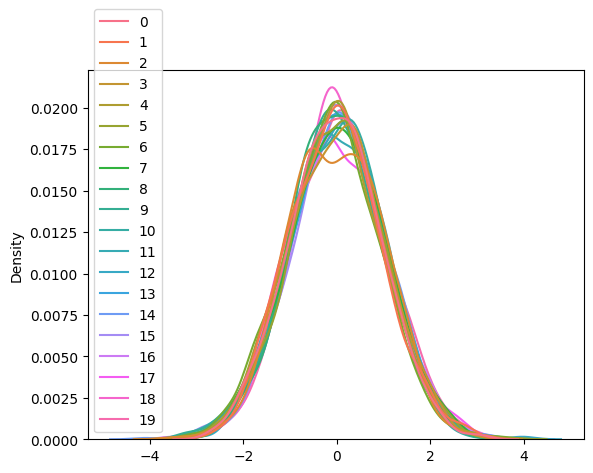

In [14]:
sns.kdeplot(data)

In [15]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_with_anomalies)

# Split the data into training and testing sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=0)

In [16]:
X_train.shape

(840, 20)

In [17]:
X_test.shape

(210, 20)

In [18]:
# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))

# Encoder
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [19]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,032 (4.03 KB)

 Trainable params: 1,032 (4.03 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the autoencoder
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=10, 
                          validation_split=0.1, 
                          shuffle=True)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078 - val_loss: 0.0055
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0044 - val_loss: 0.0049
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - 

In [25]:
# Predict the reconstruction on test data
X_test_pred = autoencoder.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(X_test, X_test_pred, multioutput='raw_values')

# Define a threshold for anomaly detection
threshold = np.percentile(mse, 90)

# Identify anomalies
anomalies = mse > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
Number of anomalies detected: 2


In [26]:
mse

array([0.00262247, 0.00351671, 0.00224019, 0.00402909, 0.0039586 ,
       0.00184236, 0.00319999, 0.00433352, 0.00329439, 0.00254353,
       0.00300837, 0.00305515, 0.00338287, 0.00311513, 0.00320872,
       0.00535038, 0.00599309, 0.00339218, 0.00623734, 0.00525616])

In [31]:
np.mean((X_test - X_test_pred) ** 2, axis=0)

array([0.00262247, 0.00351671, 0.00224019, 0.00402909, 0.0039586 ,
       0.00184236, 0.00319999, 0.00433352, 0.00329439, 0.00254353,
       0.00300837, 0.00305515, 0.00338287, 0.00311513, 0.00320872,
       0.00535038, 0.00599309, 0.00339218, 0.00623734, 0.00525616])

In [32]:
threshold

0.005414654565880869

In [36]:
sum(mse > threshold)

2

In [35]:
True + True

2

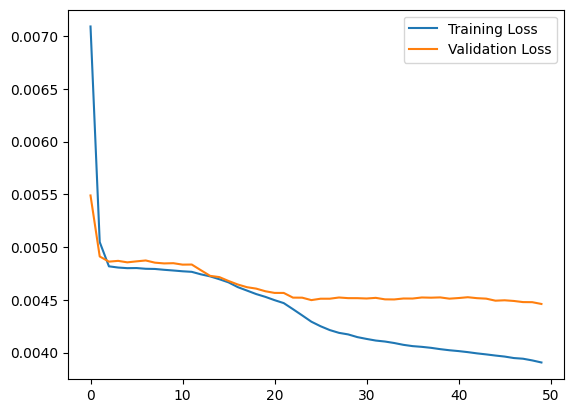

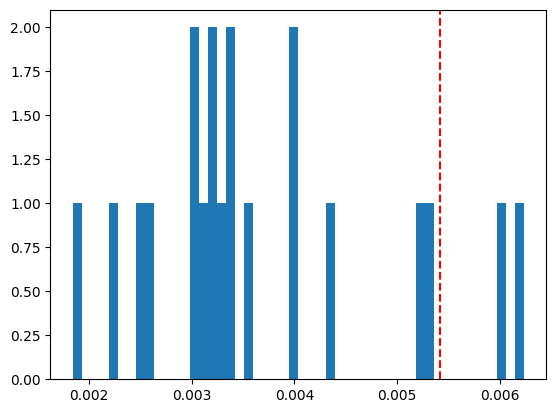

In [37]:
import matplotlib.pyplot as plt

# Plot the loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot MSE histogram
plt.hist(mse, bins=50)
plt.axvline(threshold, color='red', linestyle='--')
plt.show()